<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/ARIMA_Model_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I-From machinelearningplus.com

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.

An ARIMA model is characterized by 3 terms: p, d, q

where,

p is the order of the AR term

q is the order of the MA term

d is the number of differencing required to make the time series stationary

The value of d, therefore, is the minimum number of differencing needed to make the series stationary. And if the time series is already stationary, then d = 0.

Next, what are the ‘p’ and ‘q’ terms?

‘p’ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors. And ‘q’ is the order of the ‘Moving Average’ (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

ARIMA model in words:


Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

## How to find the order of differencing (d) in ARIMA model

First, I am going to check if the series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

So, in our case, if P Value > 0.05 we go ahead with finding the order of differencing.

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
df

,value
0,88
1,84
2,85
3,85
4,84
...,...
95,222
96,228
97,226
98,222


In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.dropna())
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

(-2.464239717203369, 0.12441935447109442, 3, 96, {'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}, 444.67104090432554)
ADF Statistic: -2.464240
p-value: 0.124419


Since P-value is greater than the significance level (not reject hypothesis mean it's stationary), let’s difference the series and see how the autocorrelation plot looks like.

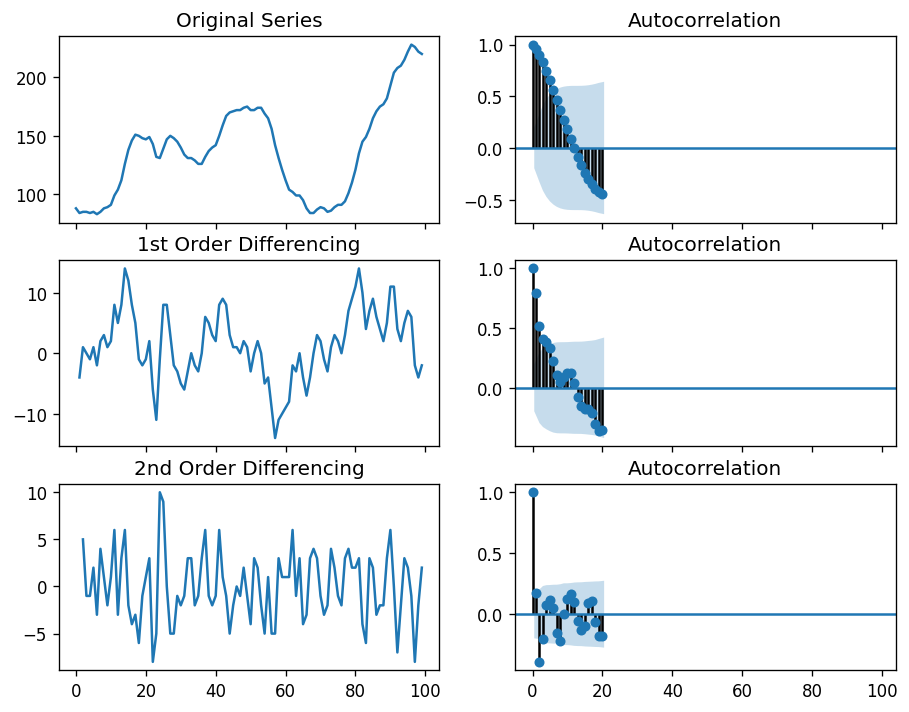

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

For the above series, the time series reaches stationarity with two orders of differencing. But on looking at the autocorrelation plot for the 2nd differencing the lag goes into the far negative zone fairly quick, which indicates, the series might have been over differenced.

So, I am going to tentatively fix the order of differencing as 1 even though the series is not perfectly stationary (weak stationarity).

## How to find the order of the AR term (p)

The next step is to identify if the model needs any AR terms. You can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

But what is PACF?

Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. That way, you will know if that lag is needed in the AR term or not.

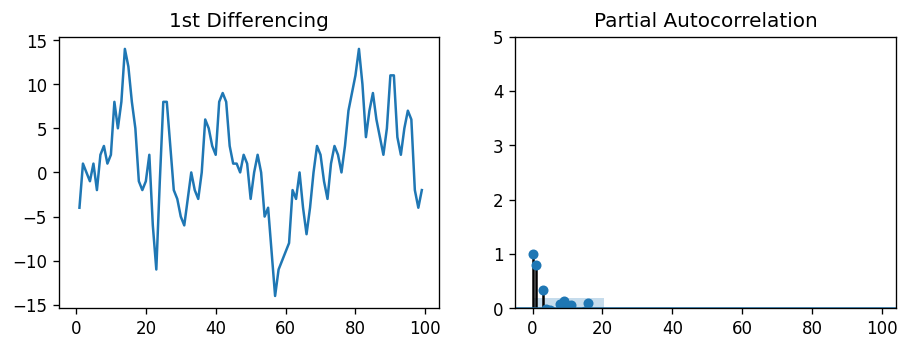

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

You can observe that the PACF lag 1 is quite significant since is well above the significance line. Lag 2 turns out to be significant as well, slightly managing to cross the significance limit (blue region). But I am going to be conservative and tentatively fix the p as 1.

##  How to find the order of the MA term (q)

Just like how we looked at the PACF plot for the number of AR terms, you can look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.

The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

Let’s see the autocorrelation plot of the differenced series.

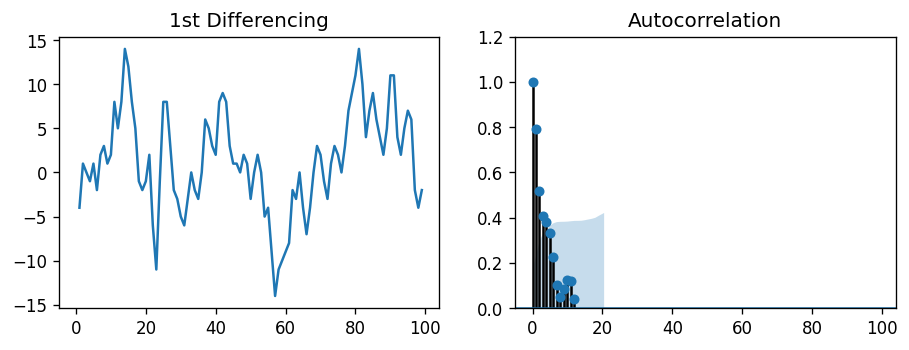

In [ ]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

Couple of lags are well above the significance line. So, let’s tentatively fix q as 2. When in doubt, go with the simpler model that sufficiently explains the Y.

p = number of lags / order of AR terms

d = order of differencing

q = number of lagged forecast errors / order of MA terms

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.value, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   99
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -253.790
Method:                       css-mle   S.D. of innovations              3.119
Date:                Thu, 02 Jul 2020   AIC                            517.579
Time:                        03:32:01   BIC                            530.555
Sample:                             1   HQIC                           522.829
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1202      1.290      0.868      0.385      -1.409       3.649
ar.L1.D.value     0.6351      0.257      2.469      0.014       0.131       1.139
ma.L1.D.value     0.5287      0.355     

Notice here the coefficient of the MA2 term is close to zero and the P-Value in ‘P>|z|’ column is highly insignificant. It should ideally be less than 0.05 for the respective X to be significant.

So, let’s rebuild the model without the MA2 term.

In [ ]:
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -253.790
Method:                       css-mle   S.D. of innovations              3.119
Date:                Thu, 02 Jul 2020   AIC                            515.579
Time:                        03:32:01   BIC                            525.960
Sample:                             1   HQIC                           519.779
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1205      1.286      0.871      0.384      -1.400       3.641
ar.L1.D.value     0.6344      0.087      7.317      0.000       0.464       0.804
ma.L1.D.value     0.5297      0.089     

The model AIC has reduced, which is good. The P Values of the AR1 and MA1 terms have improved and are highly significant (<< 0.05).

Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).

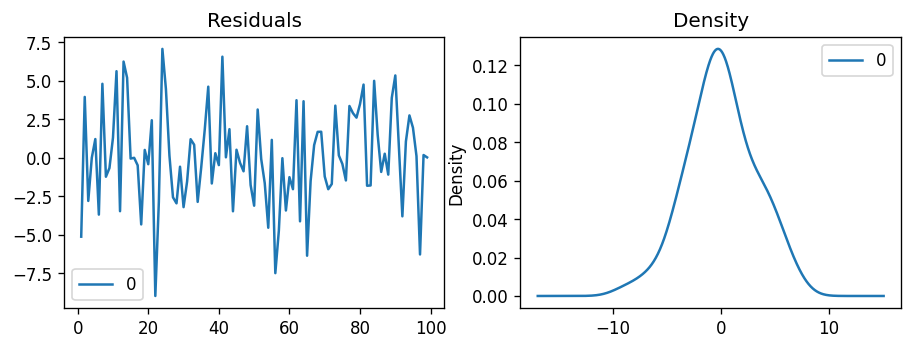

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual errors seem fine with near zero mean and uniform variance. Let’s plot the actuals against the fitted values using plot_predict().

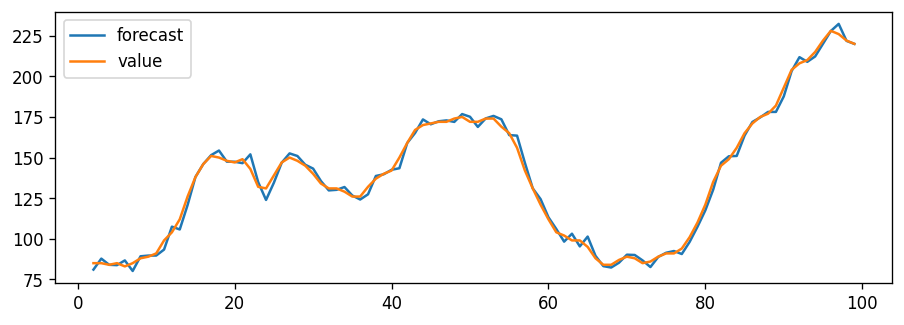

In [ ]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

When you set dynamic=False the in-sample lagged values are used for prediction.

That is, the model gets trained up until the previous value to make the next prediction. This can make the fitted forecast and actuals look artificially good.

So, we seem to have a decent ARIMA model. But is that the best?

Can’t say that at this point because we haven’t actually forecasted into the future and compared the forecast with the actual performance.

So, the real validation you need now is the Out-of-Time cross-validation.

## How to do find the optimal ARIMA model manually using Out-of-Time Cross validation

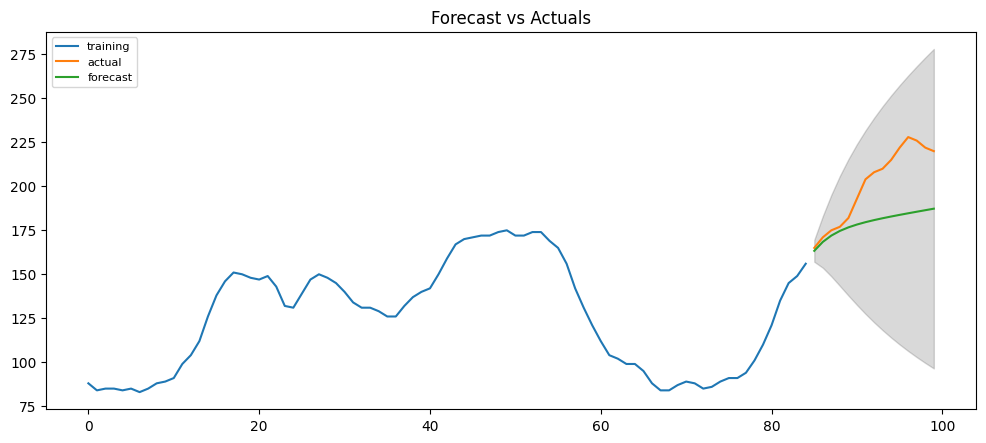

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.value[:85]
test = df.value[85:]
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  
# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
fitted.forecast(15, alpha=0.05)

(array([163.32532988, 168.39999213, 172.00547933, 174.65192874,
        176.67234417, 178.28410154, 179.62909796, 180.79996003,
        181.85715191, 182.84014295, 183.77469769, 184.67763453,
        185.55993204, 186.42875677, 187.28878682]),
 array([ 3.17352139,  7.49750738, 11.83349867, 15.95204073, 19.78523063,
        23.32933192, 26.6054389 , 29.64257931, 32.47040613, 35.11622126,
        37.60398791, 39.95423796, 42.18435311, 44.3089729 , 46.34041585]),
 array([[157.10534225, 169.54531752],
        [153.70514768, 183.09483658],
        [148.81224813, 195.19871053],
        [143.38650342, 205.91735405],
        [137.8940047 , 215.45068364],
        [132.55945118, 224.00875189],
        [127.48339592, 231.7748    ],
        [122.70157218, 238.89834788],
        [118.21632533, 245.49797849],
        [114.01361401, 251.66667189],
        [110.07223571, 257.47715968],
        [106.36876709, 262.98650196],
        [102.88011924, 268.23974484],
        [ 99.5847657 , 273.27274784],
   

From the chart, the ARIMA(1,1,1) model seems to give a directionally correct forecast. And the actual observed values lie within the 95% confidence band. That seems fine.

But each of the predicted forecasts is consistently below the actuals. That means, by adding a small constant to our forecast, the accuracy will certainly improve. So, there is definitely scope for improvement.

So, what I am going to do is to increase the order of differencing to two, that is set d=2 and iteratively increase p to up to 5 and then q up to 5 to see which model gives least AIC and also look for a chart that gives closer actuals and forecasts.

While doing this, I keep an eye on the P values of the AR and MA terms in the model summary. They should be as close to zero, ideally, less than 0.05.

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                   83
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -214.248
Method:                       css-mle   S.D. of innovations              3.153
Date:                Thu, 02 Jul 2020   AIC                            440.497
Time:                        03:32:02   BIC                            455.010
Sample:                             2   HQIC                           446.327
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0483      0.084      0.577      0.564      -0.116       0.212
ar.L1.D2.value     1.1386      0.109     10.399      0.000       0.924       1.353
ar.L2.D2.value    -0.5923      0.155

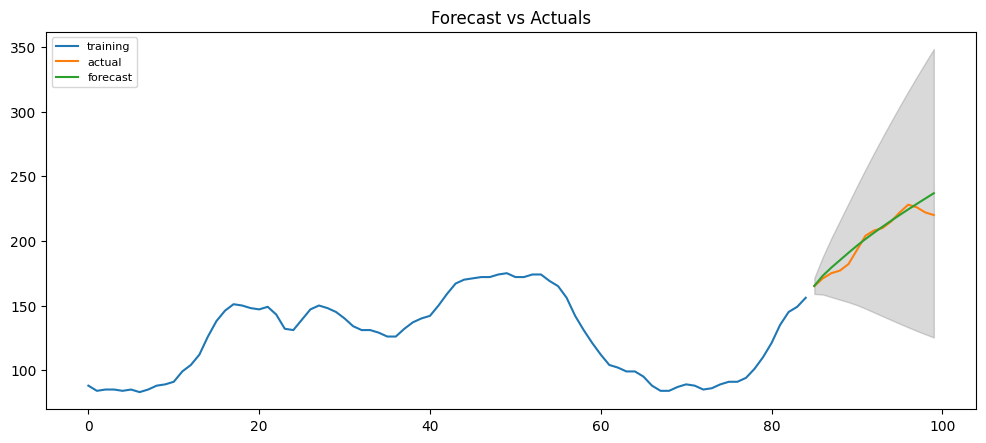

In [ ]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

The AIC has reduced to 440 from 515. Good. The P-values of the X terms are less the < 0.05, which is great.

So overall it’s much better.

Ideally, you should go back multiple points in time, like, go back 1, 2, 3 and 4 quarters and see how your forecasts are performing at various points in the year.

Here’s a great practice exercise: Try to go back 27, 30, 33, 36 data points and see how the forcasts performs. The forecast performance can be judged using various accuracy metrics discussed next.

##  Accuracy Metrics for Time Series Forecast

Mean Absolute Percentage Error (MAPE)

Mean Error (ME)

Mean Absolute Error (MAE)

Mean Percentage Error (MPE)

Root Mean Squared Error (RMSE)

Lag 1 Autocorrelation of Error (ACF1)

Correlation between the Actual and the Forecast (corr)

Min-Max Error (minmax)

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


{'acf1': 0.51054935065353,
 'corr': 0.9674576270862356,
 'mae': 4.548347730567881,
 'mape': 0.022501437547584012,
 'me': 3.230854890946811,
 'minmax': 0.02163165748301432,
 'mpe': 0.01642133821060209,
 'rmse': 6.373284525171391}

Around 2.2% MAPE implies the model is about 97.8% accurate in predicting the next 15 observations.

Now you know how to build an ARIMA model manually.

But in industrial situations, you will be given a lot of time series to be forecasted and the forecasting exercise be repeated regularly.

So we need a way to automate the best model selection process.

## How to do Auto Arima Forecast in Python

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from pandas.util._decorators import Appender

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA(1,2,1)x(0,0,0,0) [intercept=True]; AIC=525.587, BIC=535.926, Time=0.071 seconds
Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=533.474, BIC=538.644, Time=0.012 seconds
Fit ARIMA(1,2,0)x(0,0,0,0) [intercept=True]; AIC=532.437, BIC=540.192, Time=0.035 seconds
Fit ARIMA(0,2,1)x(0,0,0,0) [intercept=True]; AIC=525.893, BIC=533.648, Time=0.080 seconds
Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=False]; AIC=531.477, BIC=534.062, Time=0.020 seconds
Fit ARIMA(2,2,1)x(0,0,0,0) [intercept=True]; AIC=515.248, BIC=528.173, Time=0.084 seconds
Fit ARIMA(2,2,0)x(0,0,0,0) [intercept=True]; AIC=513.459, BIC=523.799, Time=0.072 seconds
Fit ARIMA(3,2,0)x(0,0,0,0) [intercept=True]; AIC=515.284, BIC=528.209, Time=0.071 seconds
Fit ARIMA(3,2,1)x(0,0,0,0) [intercept=True]; AIC=512.553, BIC=528.063, Time=0.426 seconds
Near non-invertible roots for order (3, 2, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit cir

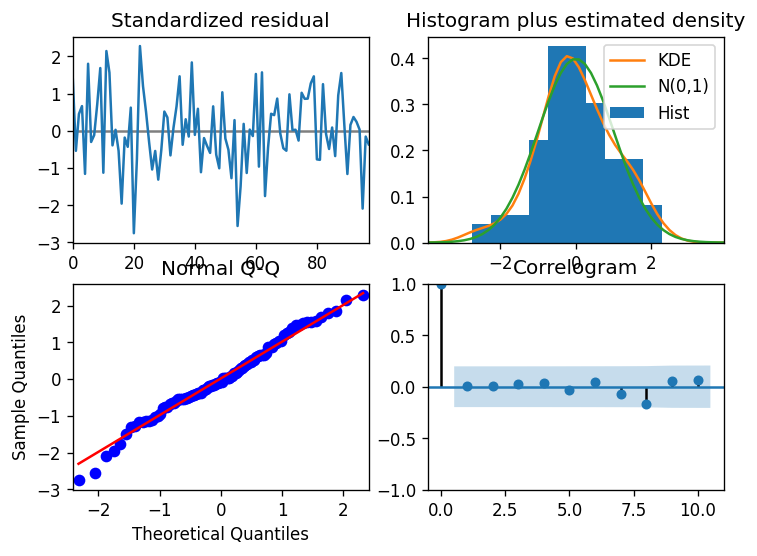

In [ ]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

So how to interpret the plot diagnostics?

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

Overall, it seems to be a good fit. Let’s forecast.

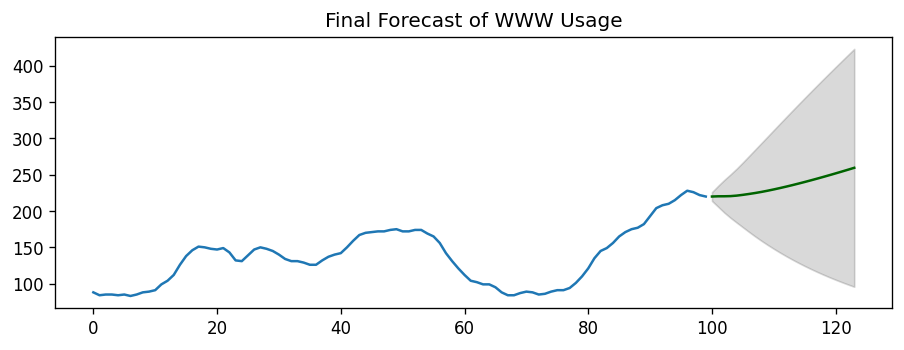

In [ ]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

## How to automatically build SARIMA model in python 

The problem with plain ARIMA model is it does not support seasonality.

If your time series has defined seasonality, then, go for SARIMA which uses seasonal differencing.

Seasonal differencing is similar to regular differencing, but, instead of subtracting consecutive terms, you subtract the value from previous season.

So, the model will be represented as SARIMA(p,d,q)x(P,D,Q), where, P, D and Q are SAR, order of seasonal differencing and SMA terms respectively and 'x' is the frequency of the time series.

If your model has well defined seasonal patterns, then enforce D=1 for a given frequency ‘x’.

Here’s some practical advice on building SARIMA model:

As a general rule, set the model parameters such that D never exceeds one. And the total differencing ‘d + D’ never exceeds 2. Try to keep only either SAR or SMA terms if your model has seasonal components.

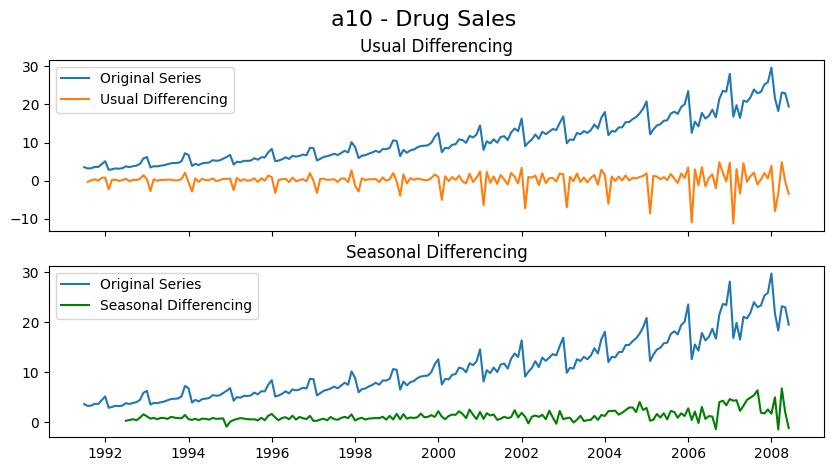

In [ ]:
# Import
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()

As you can clearly see, the seasonal spikes is intact after applying usual differencing (lag 1). Whereas, it is rectified after seasonal differencing.

Let’s build the SARIMA model using pmdarima‘s auto_arima(). To do that, you need to set seasonal=True, set the frequency m=12 for month wise series and enforce D=1.

In [ ]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,12) [intercept=True]; AIC=534.818, BIC=551.105, Time=1.814 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=624.061, BIC=630.576, Time=0.146 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=596.068, BIC=609.098, Time=0.685 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=611.475, BIC=624.505, Time=0.515 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=757.274, BIC=760.532, Time=0.037 seconds
Fit ARIMA(1,0,1)x(0,1,0,12) [intercept=True]; AIC=559.407, BIC=572.437, Time=0.388 seconds
Fit ARIMA(1,0,1)x(1,1,1,12) [intercept=True]; AIC=554.381, BIC=573.926, Time=3.425 seconds
Near non-invertible roots for order (1, 0, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,0,1)x(0,1,2,12) [intercept=True]; AIC=536.817, BIC=556.362, Time=5.916 seconds
Fit ARIMA(1,0,1)x(1,1,0,12) [intercept=True]; AIC=543.106, BIC=559.39

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  204
Model:             SARIMAX(3, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -250.092
Date:                                 Thu, 02 Jul 2020   AIC                            518.184
Time:                                         03:40:36   BIC                            547.501
Sample:                                              0   HQIC                           530.057
                                                 - 204                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0250      0.033      0.749      0.454      -0.040       0.091
ar.L1         -0.1248      0.149     -0.837      0.403      -0.417       0.168
ar.L2          0.4837      0.061      7.902      0.000       0.364       0.604
ar.L3          0.5246      0.083      6.344      0.000       0.363       0.687
ma.L1          0.1941      0.164      1.186      0.236      -0.127       0.515
ar.S.L12       0.8414      0.123      6.852      0.000       0.601       1.082
ma.S.L12      -1.6408      0.160    -10.266      0.000      -1.954      -1.328
ma.S.L24       0.8332      0.124      6.715      0.000       0.590       1.076
sigma2         0.6945      0.084      8.254      0.000       0.530       0.859
===================================================================================
Ljung-Box (Q):                       61.08   Jarque-Bera (JB):               103.73
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):              12.73   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The model has estimated the AIC and the P values of the coefficients look significant. Let’s look at the residual diagnostics plot.

The best model SARIMAX(3, 0, 0)x(0, 1, 1, 12) has an AIC of 528.6 and the P Values are significant.

Let’s forecast for the next 24 months.

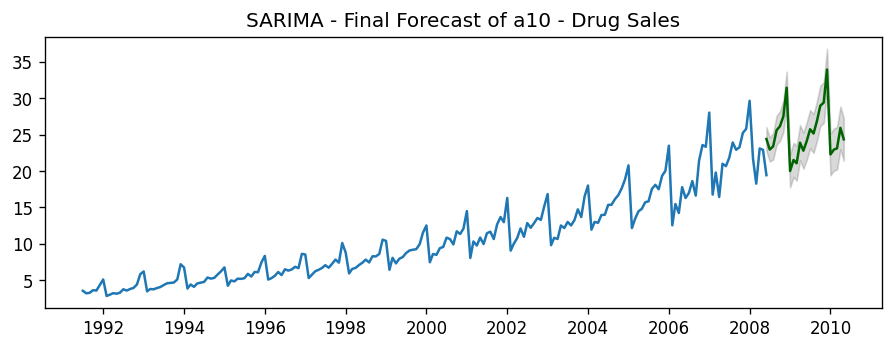

In [ ]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()

## How to build SARIMAX Model with exogenous variable

The SARIMA model we built is good. I would stop here typically.

But for the sake of completeness, let’s try and force an external predictor, also called, ‘exogenous variable’ into the model. This model is called the SARIMAX model.

The only requirement to use an exogenous variable is you need to know the value of the variable during the forecast period as well.

For the sake of demonstration, I am going to use the seasonal index from the classical seasonal decomposition on the latest 36 months of data.

Why the seasonal index? Isn’t SARIMA already modeling the seasonality, you ask?

You are correct.

But also, I want to see how the model looks if we force the recent seasonality pattern into the training and forecast.

Secondly, this is a good variable for demo purpose. So you can use this as a template and plug in any of your variables into the code. The seasonal index is a good exogenous variable because it repeats every frequency cycle, 12 months in this case.

So, you will always know what values the seasonal index will hold for the future forecasts.


In [ ]:
# Import Data
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
data

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


Let’s compute the seasonal index so that it can be forced as a (exogenous) predictor to the SARIMAX model.

In [ ]:
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index.
df

,value,month,seasonal_index
date,,,
1991-07-01,3.526591,7,0.970490
1991-08-01,3.180891,8,1.050900
1991-09-01,3.252221,9,0.998881
1991-10-01,3.611003,10,1.059657
1991-11-01,3.565869,11,1.146141
...,...,...,...
2008-02-01,21.654285,2,0.803279
2008-03-01,18.264945,3,0.850667
2008-04-01,23.107677,4,0.832227


The exogenous variable (seasonal index) is ready. Let’s build the SARIMAX model.

In [ ]:
# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,12) [intercept=True]; AIC=536.818, BIC=556.362, Time=2.637 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=626.061, BIC=635.834, Time=0.075 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=598.068, BIC=614.356, Time=0.885 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=613.475, BIC=629.762, Time=0.658 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=759.274, BIC=765.789, Time=0.149 seconds
Fit ARIMA(1,0,1)x(0,1,0,12) [intercept=True]; AIC=561.407, BIC=577.695, Time=0.473 seconds
Fit ARIMA(1,0,1)x(1,1,1,12) [intercept=True]; AIC=556.537, BIC=579.339, Time=3.785 seconds
Near non-invertible roots for order (1, 0, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,0,1)x(0,1,2,12) [intercept=True]; AIC=538.817, BIC=561.620, Time=8.485 seconds
Fit ARIMA(1,0,1)x(1,1,0,12) [intercept=True]; AIC=545.106, BIC=564.65

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  204
Model:             SARIMAX(3, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -250.092
Date:                                 Thu, 02 Jul 2020   AIC                            520.185
Time:                                         03:47:28   BIC                            552.760
Sample:                                     07-01-1991   HQIC                           533.378
                                          - 06-01-2008                                         
Covariance Type:                                   opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.0253      0.034      0.752      0.452      -0.041       0.091
seasonal_index  1.093e-05   7.86e+04   1.39e-10      1.000   -1.54e+05    1.54e+05
ar.L1             -0.1229      0.150     -0.820      0.412      -0.417       0.171
ar.L2              0.4830      0.062      7.851      0.000       0.362       0.604
ar.L3              0.5233      0.083      6.315      0.000       0.361       0.686
ma.L1              0.1922      0.165      1.163      0.245      -0.132       0.516
ar.S.L12           0.8401      0.124      6.797      0.000       0.598       1.082
ma.S.L12          -1.6397      0.167     -9.844      0.000      -1.966      -1.313
ma.S.L24           0.8332      0.130      6.417      0.000       0.579       1.088
sigma2             0.6952      0.088      7.908      0.000       0.523       0.867
===================================================================================
Ljung-Box (Q):                       61.12   Jarque-Bera (JB):               103.74
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):              12.73   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

So, we have the model with the exogenous term. But the coefficient is very small for x1, so the contribution from that variable will be negligible. Let’s forecast it anyway.

We have effectively forced the latest seasonal effect of the latest 3 years into the model instead of the entire history.

Alright let’s forecast into the next 24 months. For this, you need the value of the seasonal index for the next 24 months.

In [ ]:
seasonal_index

,seasonal,month
date,,
2007-07-01,0.970490,7
2007-08-01,1.050900,8
2007-09-01,0.998881,9
2007-10-01,1.059657,10
2007-11-01,1.146141,11
2007-12-01,1.150750,12
2008-01-01,1.316913,1
2008-02-01,0.803279,2
2008-03-01,0.850667,3


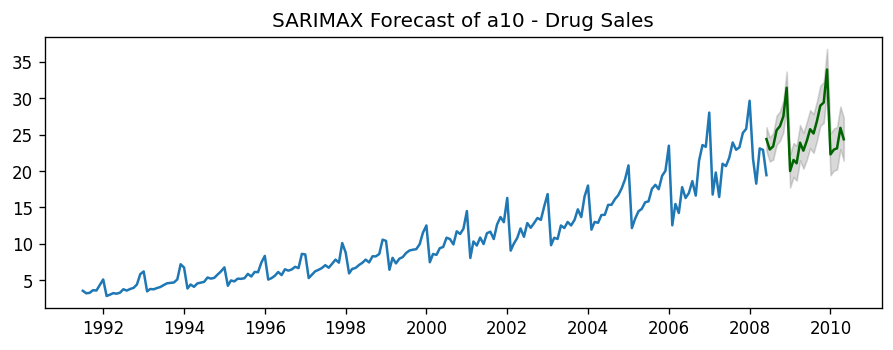

In [ ]:
# Forecast
n_periods = 24
fitted, confint = sxmodel.predict(n_periods=n_periods, 
                                  exogenous=np.tile(seasonal_index.seasonal, 2).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data['value'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX Forecast of a10 - Drug Sales")
plt.show()

# ARIMA forecasting in Python (toward data science)

https://towardsdatascience.com/arima-forecasting-in-python-90d36c2246d3

Forecasting Spotify top 200 features manually vs automtically using ARIMA

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/hd4niel/Predict-Spotify-Top200/master/data/top_200_features.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Artist,Position,Streams,Track Name,acousticness,analysis_url,danceability,date,duration_ms,energy,id_caller,id_other,instrumentalness,key,liveness,loudness,mode,region,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0,Ed Sheeran,1,51095759,Shape of You,0.5810,https://api.spotify.com/v1/audio-analysis/7qiZ...,0.825,2017-01-06--2017-01-13,233713.0,0.652,7qiZfU4dY1lWllzX7mPBI3,7qiZfU4dY1lWllzX7mPBI3,0.000000,1.0,0.0931,-3.183,0.0,global,0.0802,95.977,4.0,https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...,audio_features,spotify:track:7qiZfU4dY1lWllzX7mPBI3,0.9310
1,1,Ed Sheeran,2,35168298,Castle on the Hill,0.0232,https://api.spotify.com/v1/audio-analysis/6PCU...,0.461,2017-01-06--2017-01-13,261154.0,0.834,6PCUP3dWmTjcTtXY02oFdT,6PCUP3dWmTjcTtXY02oFdT,0.000011,2.0,0.1400,-4.868,1.0,global,0.0989,135.007,4.0,https://api.spotify.com/v1/tracks/6PCUP3dWmTjc...,audio_features,spotify:track:6PCUP3dWmTjcTtXY02oFdT,0.4710
2,2,The Weeknd,3,24261229,Starboy,0.1650,https://api.spotify.com/v1/audio-analysis/5aAx...,0.681,2017-01-06--2017-01-13,230453.0,0.594,5aAx2yezTd8zXrkmtKl66Z,5aAx2yezTd8zXrkmtKl66Z,0.000003,7.0,0.1340,-7.028,1.0,global,0.2820,186.054,4.0,https://api.spotify.com/v1/tracks/5aAx2yezTd8z...,audio_features,spotify:track:5aAx2yezTd8zXrkmtKl66Z,0.5350
3,3,Clean Bandit,4,21671209,Rockabye (feat. Sean Paul & Anne-Marie),0.4060,https://api.spotify.com/v1/audio-analysis/5knu...,0.720,2017-01-06--2017-01-13,251088.0,0.763,5knuzwU65gJK7IF5yJsuaW,5knuzwU65gJK7IF5yJsuaW,0.000000,9.0,0.1800,-4.068,0.0,global,0.0523,101.965,4.0,https://api.spotify.com/v1/tracks/5knuzwU65gJK...,audio_features,spotify:track:5knuzwU65gJK7IF5yJsuaW,0.7420
4,4,ZAYN,5,21513043,I Don’t Wanna Live Forever (Fifty Shades Darke...,0.0631,https://api.spotify.com/v1/audio-analysis/3NdD...,0.735,2017-01-06--2017-01-13,245200.0,0.451,3NdDpSvN911VPGivFlV5d0,3NdDpSvN911VPGivFlV5d0,0.000013,0.0,0.3250,-8.374,1.0,global,0.0585,117.973,4.0,https://api.spotify.com/v1/tracks/3NdDpSvN911V...,audio_features,spotify:track:3NdDpSvN911VPGivFlV5d0,0.0862


In [ ]:
df.columns

Index(['Unnamed: 0', 'Artist', 'Position', 'Streams', 'Track Name',
       'acousticness', 'analysis_url', 'danceability', 'date', 'duration_ms',
       'energy', 'id_caller', 'id_other', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'region', 'speechiness', 'tempo',
       'time_signature', 'track_href', 'type', 'uri', 'valence'],
      dtype='object')

In [ ]:
df.isnull().sum()

Unnamed: 0          0
Artist              5
Position            0
Streams             0
Track Name          5
acousticness        2
analysis_url        2
danceability        2
date                0
duration_ms         2
energy              2
id_caller           0
id_other            2
instrumentalness    2
key                 2
liveness            2
loudness            2
mode                2
region              0
speechiness         2
tempo               2
time_signature      2
track_href          2
type                2
uri                 2
valence             2
dtype: int64



Let's start by dropping tracks with missing features:

In [ ]:
s = df["danceability"].isna()
indices = s[s == True].index.values.tolist()
df = df.drop(index=indices)
df = df.reset_index()
df.head()

,index,Unnamed: 0,Artist,Position,Streams,Track Name,acousticness,analysis_url,danceability,date,duration_ms,energy,id_caller,id_other,instrumentalness,key,liveness,loudness,mode,region,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0,0,Ed Sheeran,1,51095759,Shape of You,0.5810,https://api.spotify.com/v1/audio-analysis/7qiZ...,0.825,2017-01-06--2017-01-13,233713.0,0.652,7qiZfU4dY1lWllzX7mPBI3,7qiZfU4dY1lWllzX7mPBI3,0.000000,1.0,0.0931,-3.183,0.0,global,0.0802,95.977,4.0,https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...,audio_features,spotify:track:7qiZfU4dY1lWllzX7mPBI3,0.9310
1,1,1,Ed Sheeran,2,35168298,Castle on the Hill,0.0232,https://api.spotify.com/v1/audio-analysis/6PCU...,0.461,2017-01-06--2017-01-13,261154.0,0.834,6PCUP3dWmTjcTtXY02oFdT,6PCUP3dWmTjcTtXY02oFdT,0.000011,2.0,0.1400,-4.868,1.0,global,0.0989,135.007,4.0,https://api.spotify.com/v1/tracks/6PCUP3dWmTjc...,audio_features,spotify:track:6PCUP3dWmTjcTtXY02oFdT,0.4710
2,2,2,The Weeknd,3,24261229,Starboy,0.1650,https://api.spotify.com/v1/audio-analysis/5aAx...,0.681,2017-01-06--2017-01-13,230453.0,0.594,5aAx2yezTd8zXrkmtKl66Z,5aAx2yezTd8zXrkmtKl66Z,0.000003,7.0,0.1340,-7.028,1.0,global,0.2820,186.054,4.0,https://api.spotify.com/v1/tracks/5aAx2yezTd8z...,audio_features,spotify:track:5aAx2yezTd8zXrkmtKl66Z,0.5350
3,3,3,Clean Bandit,4,21671209,Rockabye (feat. Sean Paul & Anne-Marie),0.4060,https://api.spotify.com/v1/audio-analysis/5knu...,0.720,2017-01-06--2017-01-13,251088.0,0.763,5knuzwU65gJK7IF5yJsuaW,5knuzwU65gJK7IF5yJsuaW,0.000000,9.0,0.1800,-4.068,0.0,global,0.0523,101.965,4.0,https://api.spotify.com/v1/tracks/5knuzwU65gJK...,audio_features,spotify:track:5knuzwU65gJK7IF5yJsuaW,0.7420
4,4,4,ZAYN,5,21513043,I Don’t Wanna Live Forever (Fifty Shades Darke...,0.0631,https://api.spotify.com/v1/audio-analysis/3NdD...,0.735,2017-01-06--2017-01-13,245200.0,0.451,3NdDpSvN911VPGivFlV5d0,3NdDpSvN911VPGivFlV5d0,0.000013,0.0,0.3250,-8.374,1.0,global,0.0585,117.973,4.0,https://api.spotify.com/v1/tracks/3NdDpSvN911V...,audio_features,spotify:track:3NdDpSvN911VPGivFlV5d0,0.0862


In [ ]:
df.describe()

,index,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,27800.00000,27800.00000,27800.000000,27800.000000,27800.000000,27800.000000,27800.000000,27800.000000,27800.000000,27800.000000,27800.000000,27800.000000,27800.000000,27800.000000,27800.000000
mean,13900.93036,13900.93036,0.213715,0.700417,211314.294964,0.643344,0.006624,5.284928,0.165276,-6.006076,0.597446,0.115882,119.886959,3.979640,0.492687
std,8025.94992,8025.94992,0.221096,0.129696,40494.012153,0.158091,0.046147,3.691258,0.118551,2.307012,0.490421,0.102776,29.250154,0.194392,0.215668
min,0.00000,0.00000,0.000031,0.153000,35240.000000,0.027900,0.000000,0.000000,0.021500,-34.475000,0.000000,0.023200,46.718000,1.000000,0.037000
25%,6950.75000,6950.75000,0.043700,0.624000,188174.000000,0.538000,0.000000,1.000000,0.094400,-7.114000,0.000000,0.046400,96.053000,4.000000,0.329000
50%,13901.50000,13901.50000,0.139000,0.717000,208080.000000,0.657000,0.000000,5.000000,0.121000,-5.667000,1.000000,0.072600,114.965000,4.000000,0.487000
75%,20851.25000,20851.25000,0.307000,0.789000,230453.000000,0.768000,0.000015,8.000000,0.190000,-4.405750,1.000000,0.144000,139.999000,4.000000,0.661000
max,27801.00000,27801.00000,0.994000,0.974000,577199.000000,0.978000,0.918000,11.000000,0.955000,0.175000,1.000000,0.966000,212.117000,5.000000,0.982000


In [ ]:
df.shape

(27800, 27)

Extracting numerical features and the date of every top 200 list:

In [ ]:
features = df.select_dtypes(include=["float64"])
dates = []
for i in range(0, df.shape[0], 200):
    dates.append(df["date"][i][:10])

In [ ]:
feature_mean = pd.DataFrame(columns=features.columns, index=pd.to_datetime(dates))
for feature in features.columns:
    average = []
    for i in range(0, df.shape[0], 200):
        average.append(df[feature][i:i+200].mean())
    feature_mean[feature] = average
feature_mean = feature_mean.asfreq(freq="W", method='bfill')
feature_mean.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
2017-01-08,0.188506,0.678070,222369.595,0.659144,0.011800,5.075,0.159478,-6.011535,0.585,0.118482,121.007170,4.010,0.489789
2017-01-15,0.201954,0.674755,223224.455,0.648524,0.009049,5.050,0.160663,-6.093700,0.600,0.117990,120.890135,4.010,0.481608
2017-01-22,0.194442,0.681720,223771.285,0.651434,0.007873,5.015,0.162028,-6.021405,0.600,0.119633,120.809115,4.010,0.485549
2017-01-29,0.207496,0.676025,224696.305,0.652214,0.007852,5.050,0.164080,-6.073245,0.595,0.123012,120.042640,4.015,0.482391
2017-02-05,0.207728,0.668920,224586.910,0.655065,0.007979,4.995,0.158538,-5.951895,0.610,0.117958,121.082985,4.010,0.479712


In [ ]:
feature_mean.shape

(140, 13)

## Manual forecasting using Autoregressive Integrated Moving Average (ARIMA)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

ARIMA depend on the values p, d, q

p = number of lags, AR terms

d = order of differencing

q = number of lagged forecast errors, MA terms

Mishra¹ has written more in depth on the inner workings of the ARIMA model including the parameters. My goal here is to explain how to get ARIMA quickly up and running in Python both manually and automatically. I will do the forecasting on the acousticness feature:

In [ ]:
timeseries = feature_mean["acousticness"]

Let’s use the Augmented Dickey Fuller (ADF) test to see if the timeseries is stationary:

In [ ]:
from statsmodels.tsa.stattools import adfuller
print("p-value:", adfuller(timeseries.dropna())[1])

p-value: 0.43453119367672177


In [ ]:
 adfuller(timeseries.dropna())

(-1.6933708823838471,
 0.43453119367672177,
 1,
 138,
 {'1%': -3.47864788917503,
  '10%': -2.578065326612056,
  '5%': -2.882721765644168},
 -717.52324394648)

Non-Stationary Time Series

Observations from a non-stationary time series show seasonal effects, trends, and other structures that depend on the time index.

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

p-value: 0.43
The p-value is greater than the significance level 0.05 so it is not stationary and differencing is as such needed, ie. d > 0.
We start by finding out the order of differencing, d, using auto correlation:

In [ ]:
timeseries

2017-01-08    0.188506
2017-01-15    0.201954
2017-01-22    0.194442
2017-01-29    0.207496
2017-02-05    0.207728
                ...   
2019-08-11    0.254556
2019-08-18    0.264346
2019-08-25    0.265353
2019-09-01    0.253509
2019-09-08    0.249612
Freq: W-SUN, Name: acousticness, Length: 140, dtype: float64

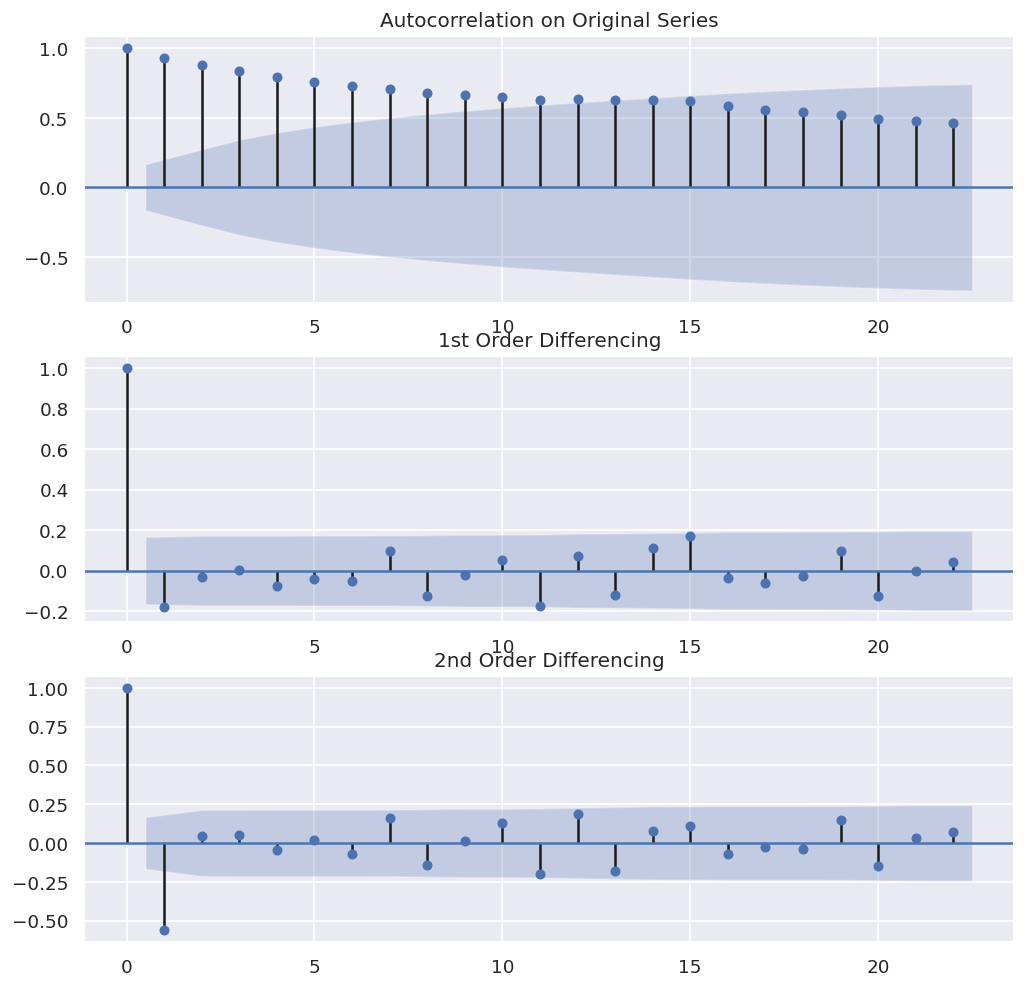

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(311)
fig = plot_acf(timeseries, ax=ax1,
               title="Autocorrelation on Original Series") 
ax2 = fig.add_subplot(312)
fig = plot_acf(timeseries.diff().dropna(), ax=ax2, 
               title="1st Order Differencing")
ax3 = fig.add_subplot(313)
fig = plot_acf(timeseries.diff().diff().dropna(), ax=ax3, 
               title="2nd Order Differencing")

The timeseries is stationary at d = 1 where only the first lag is above the significance level. If your series is slightly under differenced, try adding an additional AR term and if it is slightly over-differenced, maybe add an additional MA term.
Knowing we should difference once, we go on to find out the order of AR, p. We get it by counting the number of lags above the level of significance in partial autocorrelation:

Value for p is the amount of lags bigger than the significance level in partial autocorrelation

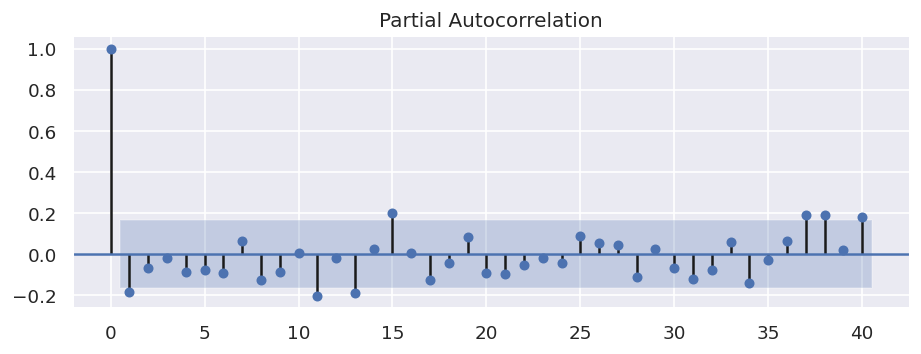

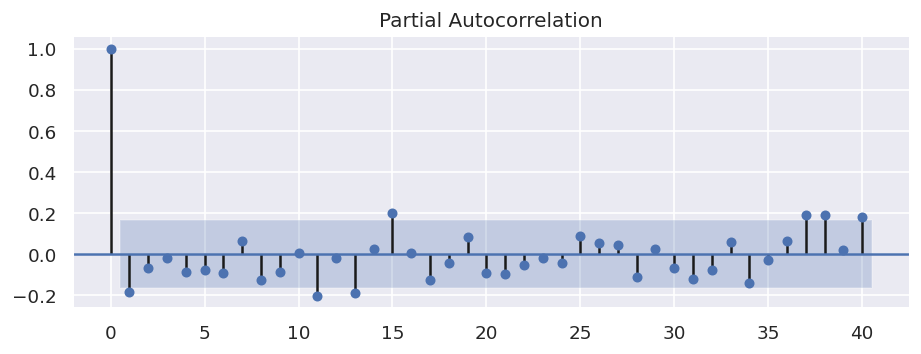

In [ ]:
plot_pacf(timeseries.diff().dropna(), lags=40) #knowing d=1 we apply diff() once

The first lag is the only one vastly above the signicance level and so p = 1.
The autocorrelation function can tell the order of MA terms, q, needed to remove autocorrelation in the stationary series.

Number of q using autocorrelation on the stationary series

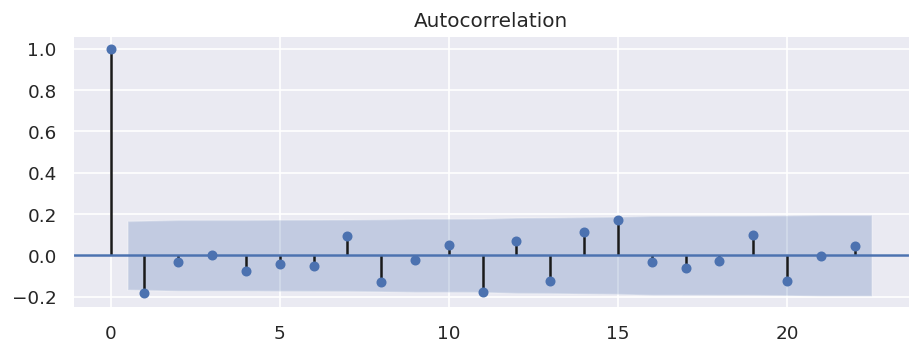

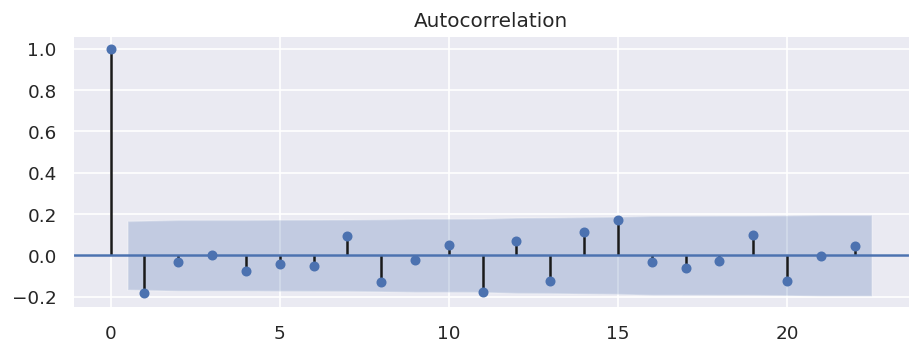

In [ ]:
plot_acf(timeseries.diff().dropna())

One lag can be found above the significance level and thus q = 1.

In [ ]:
len(timeseries)

140

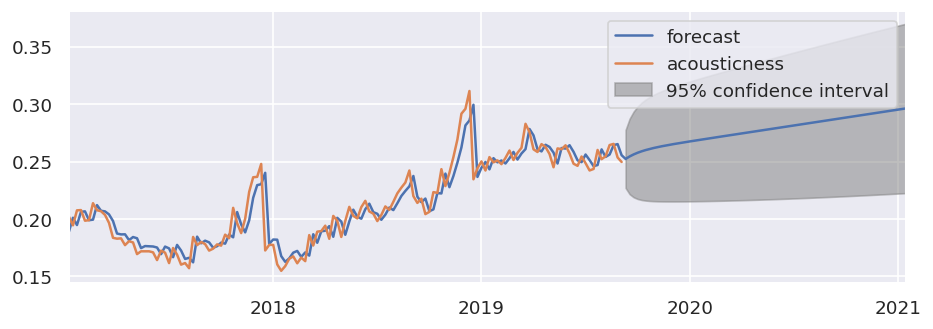

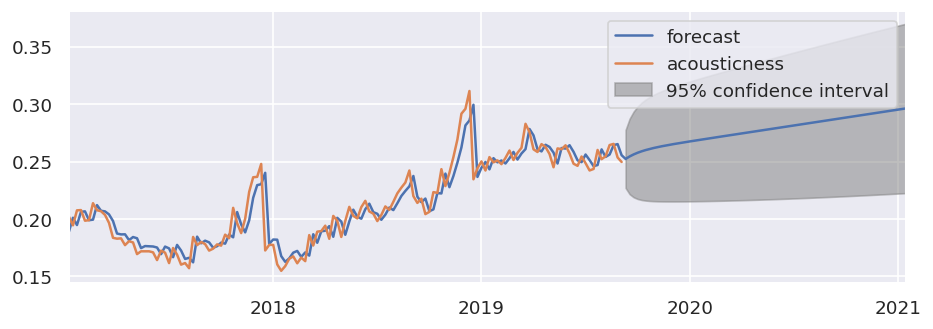

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(timeseries, order=(1, 1, 1))
results = model.fit()
results.plot_predict(1, 210)

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.acousticness   No. Observations:                  139
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 407.424
Method:                       css-mle   S.D. of innovations              0.013
Date:                Thu, 02 Jul 2020   AIC                           -806.848
Time:                        04:14:27   BIC                           -795.110
Sample:                    01-15-2017   HQIC                          -802.078
                         - 09-08-2019                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0005      0.000      1.407      0.159      -0.000       0.001
ar.L1.D.acousticness     0.7630      0.141      5.427      0.000       0.487       1.039
ma.L1.D.acousticness    -0.9335      0.094     -9.967      0.000      -1.117      -0.750
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3106           +0.0000j            1.3106            0.0000
MA.1            1.0712           +0.0000j            1.0712            0.0000
-----------------------------------------------------------------------------
"""

Akaike information criterion (AIC) estimates the relative amount of information lost by a given model. The less the better!

## Timeseries forecasting using auto_arima

In [ ]:
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              seasonal=False,
                              trace=True)
    return automodel

In [ ]:
def plotarima(n_periods, timeseries, automodel):
    # Forecast
    fc, confint = automodel.predict(n_periods=n_periods, return_conf_int=True)
    # Weekly index
    fc_ind = pd.date_range(timeseries.index[timeseries.shape[0]-1], periods=n_periods, freq="W")
    # Forecast series
    fc_series = pd.Series(fc, index=fc_ind)
    # Upper and lower confidence bounds
    lower_series = pd.Series(confint[:, 0], index=fc_ind)
    upper_series = pd.Series(confint[:, 1], index=fc_ind)
    # Create plot
    plt.figure(figsize=(10, 6))
    plt.plot(timeseries)
    plt.plot(fc_series, color="red")
    plt.xlabel("date")
    plt.ylabel(timeseries.name)
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color="k", alpha=.25)
    plt.legend(("past", "forecast", "95% confidence interval"), loc="upper left")
    plt.show()

In [ ]:
automodel = arimamodel(feature_mean["acousticness"])
automodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=-803.396, BIC=-791.658, Time=0.135 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=-801.692, BIC=-795.823, Time=0.046 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=-804.359, BIC=-795.555, Time=0.058 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=-804.923, BIC=-796.119, Time=0.245 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=-803.541, BIC=-800.607, Time=0.014 seconds
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=-803.267, BIC=-791.529, Time=0.126 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=-805.100, BIC=-790.428, Time=0.385 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=-803.177, BIC=-785.570, Time=0.463 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(1,1,3)x(0,0,0,0) [intercept=True]; AIC=-799.509, BIC=-781.903, Time=0.378 seconds
Fit ARIMA(0,1,3)x(0,0,0,0) [intercept=True]; AIC=-801.527, BIC=-786.855, Time=0.134 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=-801.195, BIC=-786.523, Time=0.130 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA(2,1,3)x(0,0,0,0) [intercept=True]; AIC=-797.401, BIC=-776.859, Time=0.423 seconds
Total fit time: 2.554 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  140
Model:               SARIMAX(1, 1, 2)   Log Likelihood                 407.550
Date:                Thu, 02 Jul 2020   AIC                           -805.100
Time:                        04:18:45   BIC                           -790.428
Sample:                             0   HQIC                          -799.138
                                - 140                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.608e-05      0.000      0.467      0.640      -0.000       0.000
ar.L1          0.8069      0.269      3.004      0.003       0.280       1.333
ma.L1         -1.0229      0.320     -3.200      0.001      -1.650      -0.396
ma.L2          0.1063      0.204      0.520      0.603      -0.294       0.507
sigma2         0.0002    1.5e-05     11.078      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       33.11   Jarque-Bera (JB):               625.39
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.39   Skew:                            -1.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

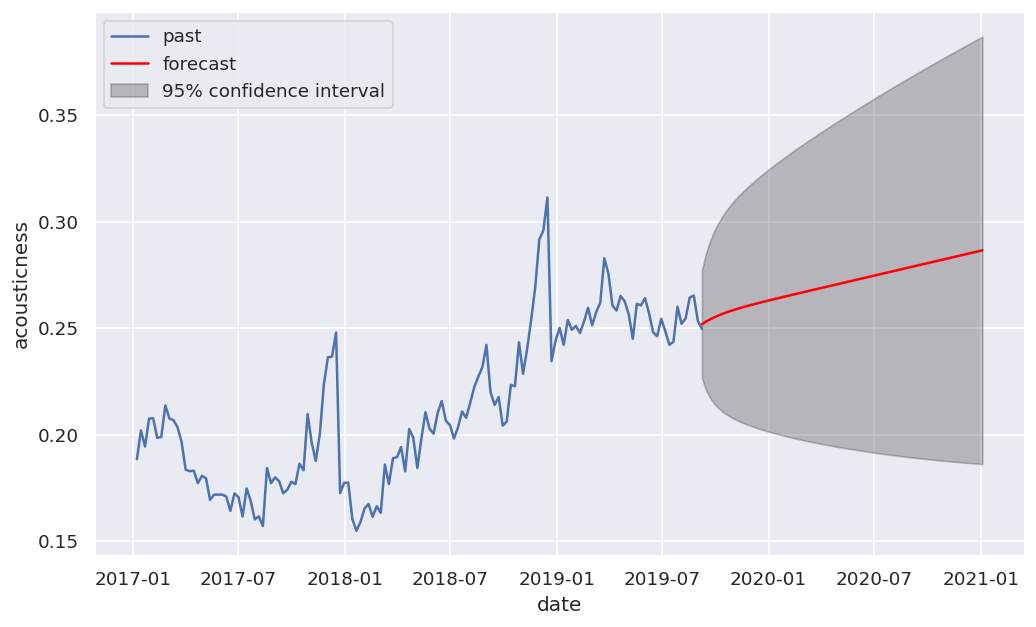

In [ ]:
plotarima(70, feature_mean["acousticness"], automodel)

Manually we got (p, d , q) = (1, 1, 1) and auto_arima found the lowest AIC value at the same parameters!

It is much less of a hazzle to use the automatic one, except for it not having a built in plot command, but that is a minor flaw IMO.

Hope this brief summary of ARIMA proved useful :)

This turned out to be the exact same parametrization we got manually. Wow that worked out well! It was far easier and faster to get the parameters right using auto_arima, the only slight downside is that the plotting has to be done from scratch to look as nice as the one statsmodels has built in.
Huge credits to the exhausting guide² on the ARIMA model over at MachineLearning+. Oh, and you can also try changing the feature from acousticness to something else eg. danceability using the aforementioned notebook.